In [1]:
import pandas as pd
import numpy as np
# Load data
df_raw = pd.read_csv("data.csv", index_col=[0])
# Drop empty column
df_raw=df_raw.drop('Unnamed: 32', axis=1)

In [2]:
# Turn B and M into 0 and 1
one_hot_df = pd.get_dummies(df_raw, drop_first=True)

In [3]:
one_hot_df.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [4]:
# Set target and features
target = one_hot_df['diagnosis_M']
one_hot_df_indep = one_hot_df.drop('diagnosis_M', axis=1)

In [5]:
# Standardise the One-hot encoded features

std_features = (one_hot_df_indep.apply(lambda x : (x - np.mean(x)) / np.std(x)))
std_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [6]:
# Split into train and test data
from sklearn.model_selection import train_test_split, GridSearchCV

X = one_hot_df_indep.values

X_train, X_test, y_train, y_test  = train_test_split(X, target, test_size = 0.2, random_state=42)
thresh = 0.4

In [26]:
from sklearn.tree import DecisionTreeClassifier

criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [int(x) for x in np.linspace(5, 55, num = 5)]


tree_params = {"criterion": criterion,
               "splitter": splitter,
               "max_depth": max_depth, 
              }


dtc = DecisionTreeClassifier(random_state=42)

dtc_grid = GridSearchCV(dtc, tree_params, cv=5, scoring ='precision', verbose=2);


dtc_grid.fit(X_train, y_train)





Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] criterion=gini, max_depth=5, splitter=best ......................
[CV] ....... criterion=gini, max_depth=5, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=5, splitter=best ......................
[CV] ....... criterion=gini, max_depth=5, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=5, splitter=best ......................
[CV] ....... criterion=gini, max_depth=5, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=5, splitter=best ......................
[CV] ....... criterion=gini, max_depth=5, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=5, splitter=best ......................
[CV] ....... criterion=gini, max_depth=5, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=5, splitter=random ....................
[CV] ..... criterion=gini, max_depth=5, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, splitter=random ....................
[CV] ..... crit

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... criterion=gini, max_depth=5, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, splitter=random ....................
[CV] ..... criterion=gini, max_depth=5, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=17, splitter=best .....................
[CV] ...... criterion=gini, max_depth=17, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=17, splitter=best .....................
[CV] ...... criterion=gini, max_depth=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=17, splitter=best .....................
[CV] ...... criterion=gini, max_depth=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=17, splitter=best .....................
[CV] ...... criterion=gini, max_depth=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=17, splitter=best .....................
[CV] ...... criterion=gini, max_depth=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=17, splitter=random ...................
[CV] .

[CV] . criterion=entropy, max_depth=17, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=17, splitter=random ................
[CV] . criterion=entropy, max_depth=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=17, splitter=random ................
[CV] . criterion=entropy, max_depth=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=17, splitter=random ................
[CV] . criterion=entropy, max_depth=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=30, splitter=best ..................
[CV] ... criterion=entropy, max_depth=30, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=30, splitter=best ..................
[CV] ... criterion=entropy, max_depth=30, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=30, splitter=best ..................
[CV] ... criterion=entropy, max_depth=30, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=30, splitter=best ..................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 17, 30, 42, 55],
                    

In [27]:
dtc_params = dtc_grid.best_params_
dtc_params

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}

In [28]:
clf_dtc = DecisionTreeClassifier(random_state = 42,
                               criterion = dtc_params['criterion'],
                               splitter = dtc_params['splitter'],
                               max_depth = dtc_params['max_depth'])



In [29]:
clf_dtc.fit(X_train, y_train)
proba_clf_dtc = clf_dtc.predict_proba(X_test)
pred_clf_dtc = clf_dtc.predict(X_test)

In [30]:
pred_clf_dtc

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=uint8)

In [31]:
proba_clf_dtc

array([[1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. ,

In [32]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred_clf_dtc))

Accuracy: 0.9473684210526315


In [34]:
dir()

['DecisionTreeClassifier',
 'GridSearchCV',
 'In',
 'Out',
 'X',
 'X_test',
 'X_train',
 '_',
 '_11',
 '_12',
 '_15',
 '_16',
 '_22',
 '_23',
 '_26',
 '_27',
 '_3',
 '_30',
 '_31',
 '_5',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'auc',
 'clf_dtc',
 'criterion',
 'df_raw',
 'dtc',
 'dtc_grid',
 'dtc_params',
 'dtc_random',
 'exit',
 'features_log',
 'get_ipython',
 'max_depth',
 'metrics',
 'np',
 'one_hot_df',
 'one_hot_df_indep',
 'pd',
 'plt',
 'pred_clf_dtc',
 'proba_clf_dtc',
 'quit',
 'scoring',
 'splitter',
 'std_features',
 'target',
 'thresh',
 'trai

In [37]:
#Confusion matrix, to see where our classifier is making mistakes:

print(metrics.confusion_matrix(y_test, pred_clf_dtc))


clf_dtc_conf = metrics.confusion_matrix(y_test,pred_clf_dtc)
plot_confusion_matrix(clf_dtc_conf, normalize=False)
plot_confusion_matrix(clf_dtc_conf, normalize=True)
plt.show()
plt.tight_layout()

[[70  1]
 [ 5 38]]


NameError: name 'plot_confusion_matrix' is not defined

In [38]:
# Other evaluation metrics...
print(metrics.classification_report(y_test, pred_clf_dtc))

auc = metrics.roc_auc_score(y_test, proba_clf_dtc[:,1])
print("AUC: ", auc)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

AUC:  0.9323616115296429


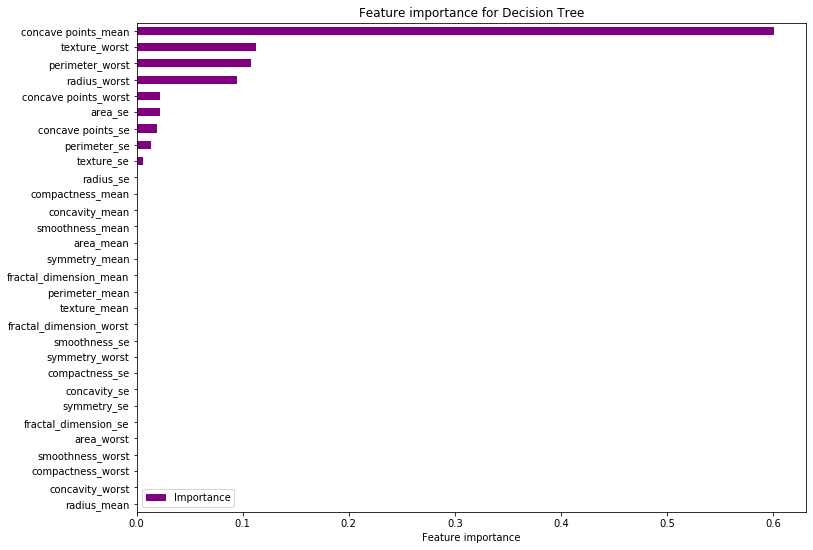

In [39]:
# Plot feature importance
from matplotlib import pyplot as plt
features_log = pd.DataFrame(clf_dtc.feature_importances_, index = one_hot_df_indep.columns.tolist(), 
                            columns = ['Importance'])
features_log = features_log.sort_values(by='Importance', ascending=True)

features_log.plot(kind='barh', figsize=(12,9), color = 'purple')
plt.xlabel('Feature importance')
plt.title('Feature importance for Decision Tree')
plt.show()

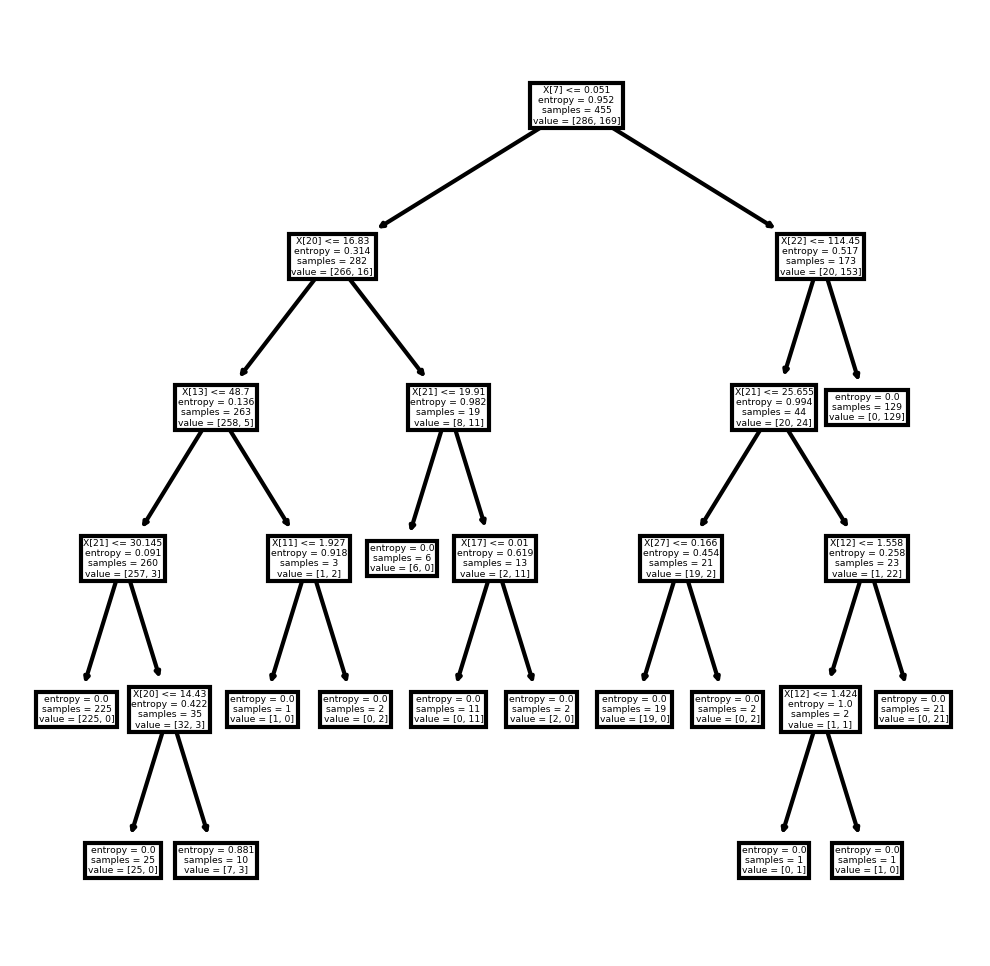

In [17]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_dtc);

In [ ]:
# * intro who we are, structure, *predictive first *introduce SE *complex and then simple. * limtation of data, what would we add to it that is missing, were there missing data? *well documemted that preexisting conditions are good predictions so this data misses that, *1 slide on the steps for the processing - preprocessing - modelling - conclusion *quick overview of what the models are. *go over the parameters tuning *we changed the parameters, we did confusion matrix, this is a way of scoring how wel clasification work, compare acorss three how they do, argue why one is better than other. creative - we also tried neurel network. *start with best bits. 'we used 4 models are this is how they compared, this is because we did this...' * if we had more time, we would...  
